# Importing the dependencies and the dataset

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


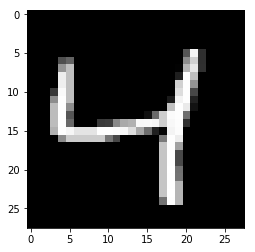

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data' , validation_size = 0)

img = mnist.train.images[2]
plt.imshow(img.reshape((28 , 28)) , cmap = 'Greys_r') 

# Network Archirecture

In [3]:
inputs_ = tf.placeholder(tf.float32 , (None , 28 , 28 , 1) , name = 'inputs')
targets_ = tf.placeholder(tf.float32 , (None , 28 , 28 , 1) , name = 'targets')

### Encoders
conv1 = tf.layers.conv2d(inputs_ , 32 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
maxpool1 = tf.layers.max_pooling2d(conv1 , (2 , 2) , (2 , 2) , padding = 'same')
conv2 = tf.layers.conv2d(maxpool1 , 32 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
maxpool2 = tf.layers.max_pooling2d(conv2 , (2 , 2) , (2 , 2) , padding = 'same')
conv3 = tf.layers.conv2d(maxpool2 , 16 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)

encoded = tf.layers.max_pooling2d(conv3 , (2 , 2) , (2 , 2) , padding = 'same')

### Decoders
upsample1 = tf.image.resize_nearest_neighbor(encoded , (7 , 7))
conv4 = tf.layers.conv2d(upsample1 , 16 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
upsample2 = tf.image.resize_nearest_neighbor(conv4 , (14 , 14))
conv5 = tf.layers.conv2d(upsample2 , 32 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)
upsample3 = tf.image.resize_nearest_neighbor(conv5 , (28 , 28))
conv6 = tf.layers.conv2d(upsample3 , 32 , (3 , 3) , padding = 'same' , activation = tf.nn.relu)

logits = tf.layers.conv2d(conv6 , 1 , (3 , 3) , padding = 'same' , activation = None)

decoded = tf.nn.sigmoid(logits , name = 'decoded')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_ , logits = logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.


# Training

In [7]:
sess = tf.Session()

epochs = 20
batch_size = 200
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1 , 28 , 28 , 1))
        
        noisy_imgs = imgs +noise_factor * np.random.rand(*imgs.shape)
        noisy_imgs = np.clip(noisy_imgs , 0. , 0.1)
        
        batch_cost,_ = sess.run([cost , opt] , feed_dict = {inputs_: noisy_imgs , targets_: imgs})
        
        print("Epoch: {}/{}...".format(e+1, epochs) , "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6925
Epoch: 1/20... Training loss: 0.6873
Epoch: 1/20... Training loss: 0.6814
Epoch: 1/20... Training loss: 0.6724
Epoch: 1/20... Training loss: 0.6608
Epoch: 1/20... Training loss: 0.6439
Epoch: 1/20... Training loss: 0.6211
Epoch: 1/20... Training loss: 0.5858
Epoch: 1/20... Training loss: 0.5468
Epoch: 1/20... Training loss: 0.5092
Epoch: 1/20... Training loss: 0.4781
Epoch: 1/20... Training loss: 0.4891
Epoch: 1/20... Training loss: 0.4890
Epoch: 1/20... Training loss: 0.5123
Epoch: 1/20... Training loss: 0.4922
Epoch: 1/20... Training loss: 0.4833
Epoch: 1/20... Training loss: 0.4482
Epoch: 1/20... Training loss: 0.4441
Epoch: 1/20... Training loss: 0.4518
Epoch: 1/20... Training loss: 0.4546
Epoch: 1/20... Training loss: 0.4496
Epoch: 1/20... Training loss: 0.4417
Epoch: 1/20... Training loss: 0.4442
Epoch: 1/20... Training loss: 0.4293
Epoch: 1/20... Training loss: 0.4292
Epoch: 1/20... Training loss: 0.4330
Epoch: 1/20... Training loss: 0.4118
E

Epoch: 1/20... Training loss: 0.2508
Epoch: 1/20... Training loss: 0.2445
Epoch: 1/20... Training loss: 0.2476
Epoch: 1/20... Training loss: 0.2511
Epoch: 1/20... Training loss: 0.2480
Epoch: 1/20... Training loss: 0.2405
Epoch: 1/20... Training loss: 0.2402
Epoch: 1/20... Training loss: 0.2456
Epoch: 1/20... Training loss: 0.2524
Epoch: 1/20... Training loss: 0.2500
Epoch: 1/20... Training loss: 0.2404
Epoch: 1/20... Training loss: 0.2469
Epoch: 1/20... Training loss: 0.2475
Epoch: 1/20... Training loss: 0.2492
Epoch: 1/20... Training loss: 0.2496
Epoch: 1/20... Training loss: 0.2455
Epoch: 1/20... Training loss: 0.2456
Epoch: 1/20... Training loss: 0.2398
Epoch: 1/20... Training loss: 0.2483
Epoch: 1/20... Training loss: 0.2450
Epoch: 1/20... Training loss: 0.2490
Epoch: 1/20... Training loss: 0.2450
Epoch: 1/20... Training loss: 0.2484
Epoch: 1/20... Training loss: 0.2494
Epoch: 1/20... Training loss: 0.2448
Epoch: 1/20... Training loss: 0.2429
Epoch: 1/20... Training loss: 0.2464
E

Epoch: 2/20... Training loss: 0.2289
Epoch: 2/20... Training loss: 0.2381
Epoch: 2/20... Training loss: 0.2289
Epoch: 2/20... Training loss: 0.2276
Epoch: 2/20... Training loss: 0.2307
Epoch: 2/20... Training loss: 0.2299
Epoch: 2/20... Training loss: 0.2228
Epoch: 2/20... Training loss: 0.2267
Epoch: 2/20... Training loss: 0.2259
Epoch: 2/20... Training loss: 0.2300
Epoch: 2/20... Training loss: 0.2299
Epoch: 2/20... Training loss: 0.2245
Epoch: 2/20... Training loss: 0.2278
Epoch: 2/20... Training loss: 0.2255
Epoch: 2/20... Training loss: 0.2258
Epoch: 2/20... Training loss: 0.2344
Epoch: 2/20... Training loss: 0.2208
Epoch: 2/20... Training loss: 0.2214
Epoch: 2/20... Training loss: 0.2308
Epoch: 2/20... Training loss: 0.2282
Epoch: 2/20... Training loss: 0.2368
Epoch: 2/20... Training loss: 0.2308
Epoch: 2/20... Training loss: 0.2246
Epoch: 2/20... Training loss: 0.2250
Epoch: 2/20... Training loss: 0.2254
Epoch: 2/20... Training loss: 0.2260
Epoch: 2/20... Training loss: 0.2205
E

Epoch: 3/20... Training loss: 0.2210
Epoch: 3/20... Training loss: 0.2163
Epoch: 3/20... Training loss: 0.2208
Epoch: 3/20... Training loss: 0.2235
Epoch: 3/20... Training loss: 0.2151
Epoch: 3/20... Training loss: 0.2153
Epoch: 3/20... Training loss: 0.2186
Epoch: 3/20... Training loss: 0.2212
Epoch: 3/20... Training loss: 0.2123
Epoch: 3/20... Training loss: 0.2167
Epoch: 3/20... Training loss: 0.2184
Epoch: 3/20... Training loss: 0.2168
Epoch: 3/20... Training loss: 0.2192
Epoch: 3/20... Training loss: 0.2157
Epoch: 3/20... Training loss: 0.2169
Epoch: 3/20... Training loss: 0.2218
Epoch: 3/20... Training loss: 0.2182
Epoch: 3/20... Training loss: 0.2210
Epoch: 3/20... Training loss: 0.2160
Epoch: 3/20... Training loss: 0.2125
Epoch: 3/20... Training loss: 0.2174
Epoch: 3/20... Training loss: 0.2141
Epoch: 3/20... Training loss: 0.2206
Epoch: 3/20... Training loss: 0.2099
Epoch: 3/20... Training loss: 0.2100
Epoch: 3/20... Training loss: 0.2150
Epoch: 3/20... Training loss: 0.2190
E

Epoch: 3/20... Training loss: 0.2110
Epoch: 3/20... Training loss: 0.2089
Epoch: 3/20... Training loss: 0.2045
Epoch: 3/20... Training loss: 0.2085
Epoch: 3/20... Training loss: 0.2173
Epoch: 3/20... Training loss: 0.2117
Epoch: 3/20... Training loss: 0.2054
Epoch: 3/20... Training loss: 0.2034
Epoch: 3/20... Training loss: 0.2153
Epoch: 3/20... Training loss: 0.2108
Epoch: 3/20... Training loss: 0.2062
Epoch: 3/20... Training loss: 0.2063
Epoch: 4/20... Training loss: 0.2082
Epoch: 4/20... Training loss: 0.2075
Epoch: 4/20... Training loss: 0.2138
Epoch: 4/20... Training loss: 0.2129
Epoch: 4/20... Training loss: 0.2082
Epoch: 4/20... Training loss: 0.2134
Epoch: 4/20... Training loss: 0.2102
Epoch: 4/20... Training loss: 0.2097
Epoch: 4/20... Training loss: 0.2087
Epoch: 4/20... Training loss: 0.2109
Epoch: 4/20... Training loss: 0.2066
Epoch: 4/20... Training loss: 0.2089
Epoch: 4/20... Training loss: 0.2045
Epoch: 4/20... Training loss: 0.2078
Epoch: 4/20... Training loss: 0.2096
E

Epoch: 4/20... Training loss: 0.2091
Epoch: 4/20... Training loss: 0.2089
Epoch: 4/20... Training loss: 0.2042
Epoch: 4/20... Training loss: 0.2020
Epoch: 4/20... Training loss: 0.2042
Epoch: 4/20... Training loss: 0.2045
Epoch: 4/20... Training loss: 0.2042
Epoch: 4/20... Training loss: 0.2104
Epoch: 4/20... Training loss: 0.2055
Epoch: 4/20... Training loss: 0.2107
Epoch: 4/20... Training loss: 0.2031
Epoch: 4/20... Training loss: 0.2010
Epoch: 4/20... Training loss: 0.2091
Epoch: 4/20... Training loss: 0.2065
Epoch: 4/20... Training loss: 0.2026
Epoch: 4/20... Training loss: 0.2085
Epoch: 4/20... Training loss: 0.2075
Epoch: 4/20... Training loss: 0.2001
Epoch: 4/20... Training loss: 0.2092
Epoch: 4/20... Training loss: 0.2067
Epoch: 4/20... Training loss: 0.2081
Epoch: 4/20... Training loss: 0.2070
Epoch: 4/20... Training loss: 0.2144
Epoch: 4/20... Training loss: 0.2054
Epoch: 4/20... Training loss: 0.2097
Epoch: 4/20... Training loss: 0.2022
Epoch: 4/20... Training loss: 0.2119
E

Epoch: 5/20... Training loss: 0.2053
Epoch: 5/20... Training loss: 0.2022
Epoch: 5/20... Training loss: 0.1976
Epoch: 5/20... Training loss: 0.1946
Epoch: 5/20... Training loss: 0.2048
Epoch: 5/20... Training loss: 0.2016
Epoch: 5/20... Training loss: 0.2064
Epoch: 5/20... Training loss: 0.2060
Epoch: 5/20... Training loss: 0.2046
Epoch: 5/20... Training loss: 0.2013
Epoch: 5/20... Training loss: 0.2119
Epoch: 5/20... Training loss: 0.2025
Epoch: 5/20... Training loss: 0.2047
Epoch: 5/20... Training loss: 0.2087
Epoch: 5/20... Training loss: 0.1998
Epoch: 5/20... Training loss: 0.2056
Epoch: 5/20... Training loss: 0.2031
Epoch: 5/20... Training loss: 0.2049
Epoch: 5/20... Training loss: 0.2008
Epoch: 5/20... Training loss: 0.2052
Epoch: 5/20... Training loss: 0.1989
Epoch: 5/20... Training loss: 0.2011
Epoch: 5/20... Training loss: 0.2052
Epoch: 5/20... Training loss: 0.2068
Epoch: 5/20... Training loss: 0.2031
Epoch: 5/20... Training loss: 0.2026
Epoch: 5/20... Training loss: 0.1976
E

Epoch: 6/20... Training loss: 0.1951
Epoch: 6/20... Training loss: 0.1955
Epoch: 6/20... Training loss: 0.1936
Epoch: 6/20... Training loss: 0.1981
Epoch: 6/20... Training loss: 0.1989
Epoch: 6/20... Training loss: 0.2080
Epoch: 6/20... Training loss: 0.2036
Epoch: 6/20... Training loss: 0.2018
Epoch: 6/20... Training loss: 0.1975
Epoch: 6/20... Training loss: 0.1944
Epoch: 6/20... Training loss: 0.1974
Epoch: 6/20... Training loss: 0.2020
Epoch: 6/20... Training loss: 0.1968
Epoch: 6/20... Training loss: 0.2010
Epoch: 6/20... Training loss: 0.2020
Epoch: 6/20... Training loss: 0.2014
Epoch: 6/20... Training loss: 0.2011
Epoch: 6/20... Training loss: 0.1962
Epoch: 6/20... Training loss: 0.1955
Epoch: 6/20... Training loss: 0.1948
Epoch: 6/20... Training loss: 0.2017
Epoch: 6/20... Training loss: 0.1981
Epoch: 6/20... Training loss: 0.1934
Epoch: 6/20... Training loss: 0.1939
Epoch: 6/20... Training loss: 0.2060
Epoch: 6/20... Training loss: 0.1951
Epoch: 6/20... Training loss: 0.2006
E

Epoch: 6/20... Training loss: 0.1975
Epoch: 6/20... Training loss: 0.2022
Epoch: 6/20... Training loss: 0.2022
Epoch: 6/20... Training loss: 0.1980
Epoch: 6/20... Training loss: 0.1982
Epoch: 6/20... Training loss: 0.2014
Epoch: 6/20... Training loss: 0.1953
Epoch: 6/20... Training loss: 0.1992
Epoch: 6/20... Training loss: 0.1937
Epoch: 6/20... Training loss: 0.1981
Epoch: 6/20... Training loss: 0.1938
Epoch: 6/20... Training loss: 0.1937
Epoch: 6/20... Training loss: 0.1979
Epoch: 6/20... Training loss: 0.1921
Epoch: 6/20... Training loss: 0.1955
Epoch: 6/20... Training loss: 0.1992
Epoch: 6/20... Training loss: 0.1992
Epoch: 6/20... Training loss: 0.1933
Epoch: 6/20... Training loss: 0.1911
Epoch: 6/20... Training loss: 0.1928
Epoch: 6/20... Training loss: 0.1961
Epoch: 6/20... Training loss: 0.2007
Epoch: 6/20... Training loss: 0.1941
Epoch: 6/20... Training loss: 0.1935
Epoch: 7/20... Training loss: 0.1947
Epoch: 7/20... Training loss: 0.1968
Epoch: 7/20... Training loss: 0.2002
E

Epoch: 7/20... Training loss: 0.1988
Epoch: 7/20... Training loss: 0.1905
Epoch: 7/20... Training loss: 0.1947
Epoch: 7/20... Training loss: 0.1987
Epoch: 7/20... Training loss: 0.1980
Epoch: 7/20... Training loss: 0.1910
Epoch: 7/20... Training loss: 0.1946
Epoch: 7/20... Training loss: 0.1923
Epoch: 7/20... Training loss: 0.1865
Epoch: 7/20... Training loss: 0.1993
Epoch: 7/20... Training loss: 0.1934
Epoch: 7/20... Training loss: 0.1955
Epoch: 7/20... Training loss: 0.1931
Epoch: 7/20... Training loss: 0.1973
Epoch: 7/20... Training loss: 0.1943
Epoch: 7/20... Training loss: 0.1994
Epoch: 7/20... Training loss: 0.1937
Epoch: 7/20... Training loss: 0.1988
Epoch: 7/20... Training loss: 0.1971
Epoch: 7/20... Training loss: 0.1944
Epoch: 7/20... Training loss: 0.1969
Epoch: 7/20... Training loss: 0.1934
Epoch: 7/20... Training loss: 0.1936
Epoch: 7/20... Training loss: 0.1954
Epoch: 7/20... Training loss: 0.1939
Epoch: 7/20... Training loss: 0.1981
Epoch: 7/20... Training loss: 0.1938
E

Epoch: 8/20... Training loss: 0.1929
Epoch: 8/20... Training loss: 0.1964
Epoch: 8/20... Training loss: 0.1954
Epoch: 8/20... Training loss: 0.2002
Epoch: 8/20... Training loss: 0.1901
Epoch: 8/20... Training loss: 0.1884
Epoch: 8/20... Training loss: 0.1882
Epoch: 8/20... Training loss: 0.1909
Epoch: 8/20... Training loss: 0.1986
Epoch: 8/20... Training loss: 0.1823
Epoch: 8/20... Training loss: 0.1896
Epoch: 8/20... Training loss: 0.1949
Epoch: 8/20... Training loss: 0.1957
Epoch: 8/20... Training loss: 0.1885
Epoch: 8/20... Training loss: 0.1900
Epoch: 8/20... Training loss: 0.1922
Epoch: 8/20... Training loss: 0.1963
Epoch: 8/20... Training loss: 0.2000
Epoch: 8/20... Training loss: 0.1953
Epoch: 8/20... Training loss: 0.1975
Epoch: 8/20... Training loss: 0.1938
Epoch: 8/20... Training loss: 0.1983
Epoch: 8/20... Training loss: 0.1910
Epoch: 8/20... Training loss: 0.1999
Epoch: 8/20... Training loss: 0.1916
Epoch: 8/20... Training loss: 0.1926
Epoch: 8/20... Training loss: 0.1949
E

Epoch: 9/20... Training loss: 0.1910
Epoch: 9/20... Training loss: 0.1875
Epoch: 9/20... Training loss: 0.1829
Epoch: 9/20... Training loss: 0.1872
Epoch: 9/20... Training loss: 0.1890
Epoch: 9/20... Training loss: 0.1903
Epoch: 9/20... Training loss: 0.1919
Epoch: 9/20... Training loss: 0.1951
Epoch: 9/20... Training loss: 0.1917
Epoch: 9/20... Training loss: 0.1919
Epoch: 9/20... Training loss: 0.1877
Epoch: 9/20... Training loss: 0.1871
Epoch: 9/20... Training loss: 0.1867
Epoch: 9/20... Training loss: 0.1900
Epoch: 9/20... Training loss: 0.1909
Epoch: 9/20... Training loss: 0.1914
Epoch: 9/20... Training loss: 0.1911
Epoch: 9/20... Training loss: 0.1877
Epoch: 9/20... Training loss: 0.1933
Epoch: 9/20... Training loss: 0.1918
Epoch: 9/20... Training loss: 0.1897
Epoch: 9/20... Training loss: 0.1902
Epoch: 9/20... Training loss: 0.1890
Epoch: 9/20... Training loss: 0.1947
Epoch: 9/20... Training loss: 0.1899
Epoch: 9/20... Training loss: 0.1877
Epoch: 9/20... Training loss: 0.1884
E

Epoch: 9/20... Training loss: 0.1878
Epoch: 9/20... Training loss: 0.1893
Epoch: 9/20... Training loss: 0.1890
Epoch: 9/20... Training loss: 0.1930
Epoch: 9/20... Training loss: 0.1857
Epoch: 9/20... Training loss: 0.1878
Epoch: 9/20... Training loss: 0.1873
Epoch: 9/20... Training loss: 0.1865
Epoch: 9/20... Training loss: 0.1879
Epoch: 9/20... Training loss: 0.1893
Epoch: 9/20... Training loss: 0.1944
Epoch: 9/20... Training loss: 0.1917
Epoch: 9/20... Training loss: 0.1894
Epoch: 9/20... Training loss: 0.1869
Epoch: 9/20... Training loss: 0.1866
Epoch: 9/20... Training loss: 0.1860
Epoch: 9/20... Training loss: 0.1899
Epoch: 9/20... Training loss: 0.1858
Epoch: 9/20... Training loss: 0.1859
Epoch: 9/20... Training loss: 0.1860
Epoch: 9/20... Training loss: 0.1872
Epoch: 9/20... Training loss: 0.1861
Epoch: 9/20... Training loss: 0.1887
Epoch: 9/20... Training loss: 0.1858
Epoch: 9/20... Training loss: 0.1873
Epoch: 9/20... Training loss: 0.1858
Epoch: 9/20... Training loss: 0.1907
E

Epoch: 10/20... Training loss: 0.1904
Epoch: 10/20... Training loss: 0.1870
Epoch: 10/20... Training loss: 0.1911
Epoch: 10/20... Training loss: 0.1810
Epoch: 10/20... Training loss: 0.1863
Epoch: 10/20... Training loss: 0.1894
Epoch: 10/20... Training loss: 0.1880
Epoch: 10/20... Training loss: 0.1867
Epoch: 10/20... Training loss: 0.1851
Epoch: 10/20... Training loss: 0.1862
Epoch: 10/20... Training loss: 0.1832
Epoch: 10/20... Training loss: 0.1865
Epoch: 10/20... Training loss: 0.1845
Epoch: 10/20... Training loss: 0.1860
Epoch: 10/20... Training loss: 0.1868
Epoch: 10/20... Training loss: 0.1862
Epoch: 10/20... Training loss: 0.1885
Epoch: 10/20... Training loss: 0.1816
Epoch: 10/20... Training loss: 0.1805
Epoch: 10/20... Training loss: 0.1855
Epoch: 10/20... Training loss: 0.1799
Epoch: 10/20... Training loss: 0.1905
Epoch: 10/20... Training loss: 0.1868
Epoch: 10/20... Training loss: 0.1856
Epoch: 10/20... Training loss: 0.1875
Epoch: 10/20... Training loss: 0.1805
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1864
Epoch: 11/20... Training loss: 0.1867
Epoch: 11/20... Training loss: 0.1845
Epoch: 11/20... Training loss: 0.1883
Epoch: 11/20... Training loss: 0.1798
Epoch: 11/20... Training loss: 0.1848
Epoch: 11/20... Training loss: 0.1887
Epoch: 11/20... Training loss: 0.1832
Epoch: 11/20... Training loss: 0.1839
Epoch: 11/20... Training loss: 0.1793
Epoch: 11/20... Training loss: 0.1774
Epoch: 11/20... Training loss: 0.1896
Epoch: 11/20... Training loss: 0.1792
Epoch: 11/20... Training loss: 0.1871
Epoch: 11/20... Training loss: 0.1855
Epoch: 11/20... Training loss: 0.1820
Epoch: 11/20... Training loss: 0.1858
Epoch: 11/20... Training loss: 0.1824
Epoch: 11/20... Training loss: 0.1742
Epoch: 11/20... Training loss: 0.1887
Epoch: 11/20... Training loss: 0.1854
Epoch: 11/20... Training loss: 0.1816
Epoch: 11/20... Training loss: 0.1897
Epoch: 11/20... Training loss: 0.1835
Epoch: 11/20... Training loss: 0.1864
Epoch: 11/20... Training loss: 0.1856
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1866
Epoch: 12/20... Training loss: 0.1850
Epoch: 12/20... Training loss: 0.1863
Epoch: 12/20... Training loss: 0.1870
Epoch: 12/20... Training loss: 0.1809
Epoch: 12/20... Training loss: 0.1851
Epoch: 12/20... Training loss: 0.1874
Epoch: 12/20... Training loss: 0.1890
Epoch: 12/20... Training loss: 0.1821
Epoch: 12/20... Training loss: 0.1864
Epoch: 12/20... Training loss: 0.1835
Epoch: 12/20... Training loss: 0.1849
Epoch: 12/20... Training loss: 0.1859
Epoch: 12/20... Training loss: 0.1866
Epoch: 12/20... Training loss: 0.1875
Epoch: 12/20... Training loss: 0.1873
Epoch: 12/20... Training loss: 0.1827
Epoch: 12/20... Training loss: 0.1844
Epoch: 12/20... Training loss: 0.1830
Epoch: 12/20... Training loss: 0.1840
Epoch: 12/20... Training loss: 0.1860
Epoch: 12/20... Training loss: 0.1870
Epoch: 12/20... Training loss: 0.1794
Epoch: 12/20... Training loss: 0.1901
Epoch: 12/20... Training loss: 0.1906
Epoch: 12/20... Training loss: 0.1847
Epoch: 12/20

Epoch: 12/20... Training loss: 0.1819
Epoch: 12/20... Training loss: 0.1829
Epoch: 12/20... Training loss: 0.1867
Epoch: 12/20... Training loss: 0.1865
Epoch: 12/20... Training loss: 0.1889
Epoch: 12/20... Training loss: 0.1844
Epoch: 12/20... Training loss: 0.1817
Epoch: 12/20... Training loss: 0.1821
Epoch: 12/20... Training loss: 0.1779
Epoch: 12/20... Training loss: 0.1841
Epoch: 12/20... Training loss: 0.1830
Epoch: 12/20... Training loss: 0.1837
Epoch: 12/20... Training loss: 0.1820
Epoch: 12/20... Training loss: 0.1831
Epoch: 12/20... Training loss: 0.1846
Epoch: 12/20... Training loss: 0.1828
Epoch: 12/20... Training loss: 0.1843
Epoch: 12/20... Training loss: 0.1835
Epoch: 12/20... Training loss: 0.1819
Epoch: 12/20... Training loss: 0.1843
Epoch: 12/20... Training loss: 0.1839
Epoch: 12/20... Training loss: 0.1813
Epoch: 12/20... Training loss: 0.1860
Epoch: 12/20... Training loss: 0.1840
Epoch: 12/20... Training loss: 0.1866
Epoch: 12/20... Training loss: 0.1831
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1781
Epoch: 13/20... Training loss: 0.1886
Epoch: 13/20... Training loss: 0.1840
Epoch: 13/20... Training loss: 0.1889
Epoch: 13/20... Training loss: 0.1830
Epoch: 13/20... Training loss: 0.1796
Epoch: 13/20... Training loss: 0.1777
Epoch: 13/20... Training loss: 0.1831
Epoch: 13/20... Training loss: 0.1832
Epoch: 13/20... Training loss: 0.1823
Epoch: 13/20... Training loss: 0.1873
Epoch: 13/20... Training loss: 0.1829
Epoch: 13/20... Training loss: 0.1798
Epoch: 13/20... Training loss: 0.1905
Epoch: 13/20... Training loss: 0.1857
Epoch: 13/20... Training loss: 0.1881
Epoch: 13/20... Training loss: 0.1851
Epoch: 13/20... Training loss: 0.1805
Epoch: 13/20... Training loss: 0.1843
Epoch: 13/20... Training loss: 0.1795
Epoch: 13/20... Training loss: 0.1826
Epoch: 13/20... Training loss: 0.1827
Epoch: 13/20... Training loss: 0.1823
Epoch: 13/20... Training loss: 0.1779
Epoch: 13/20... Training loss: 0.1843
Epoch: 13/20... Training loss: 0.1798
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1908
Epoch: 14/20... Training loss: 0.1820
Epoch: 14/20... Training loss: 0.1825
Epoch: 14/20... Training loss: 0.1889
Epoch: 14/20... Training loss: 0.1790
Epoch: 14/20... Training loss: 0.1835
Epoch: 14/20... Training loss: 0.1758
Epoch: 14/20... Training loss: 0.1860
Epoch: 14/20... Training loss: 0.1758
Epoch: 14/20... Training loss: 0.1816
Epoch: 14/20... Training loss: 0.1766
Epoch: 14/20... Training loss: 0.1774
Epoch: 14/20... Training loss: 0.1835
Epoch: 14/20... Training loss: 0.1828
Epoch: 14/20... Training loss: 0.1830
Epoch: 14/20... Training loss: 0.1798
Epoch: 14/20... Training loss: 0.1835
Epoch: 14/20... Training loss: 0.1796
Epoch: 14/20... Training loss: 0.1815
Epoch: 14/20... Training loss: 0.1706
Epoch: 14/20... Training loss: 0.1792
Epoch: 14/20... Training loss: 0.1855
Epoch: 14/20... Training loss: 0.1786
Epoch: 14/20... Training loss: 0.1816
Epoch: 14/20... Training loss: 0.1843
Epoch: 14/20... Training loss: 0.1831
Epoch: 14/20

Epoch: 14/20... Training loss: 0.1810
Epoch: 14/20... Training loss: 0.1801
Epoch: 14/20... Training loss: 0.1798
Epoch: 14/20... Training loss: 0.1823
Epoch: 14/20... Training loss: 0.1843
Epoch: 14/20... Training loss: 0.1828
Epoch: 14/20... Training loss: 0.1793
Epoch: 14/20... Training loss: 0.1766
Epoch: 14/20... Training loss: 0.1767
Epoch: 14/20... Training loss: 0.1822
Epoch: 14/20... Training loss: 0.1835
Epoch: 14/20... Training loss: 0.1760
Epoch: 14/20... Training loss: 0.1870
Epoch: 14/20... Training loss: 0.1828
Epoch: 14/20... Training loss: 0.1718
Epoch: 14/20... Training loss: 0.1786
Epoch: 14/20... Training loss: 0.1807
Epoch: 14/20... Training loss: 0.1804
Epoch: 14/20... Training loss: 0.1819
Epoch: 14/20... Training loss: 0.1822
Epoch: 14/20... Training loss: 0.1772
Epoch: 14/20... Training loss: 0.1791
Epoch: 14/20... Training loss: 0.1806
Epoch: 15/20... Training loss: 0.1831
Epoch: 15/20... Training loss: 0.1760
Epoch: 15/20... Training loss: 0.1829
Epoch: 15/20

Epoch: 15/20... Training loss: 0.1869
Epoch: 15/20... Training loss: 0.1766
Epoch: 15/20... Training loss: 0.1760
Epoch: 15/20... Training loss: 0.1856
Epoch: 15/20... Training loss: 0.1848
Epoch: 15/20... Training loss: 0.1731
Epoch: 15/20... Training loss: 0.1816
Epoch: 15/20... Training loss: 0.1786
Epoch: 15/20... Training loss: 0.1796
Epoch: 15/20... Training loss: 0.1832
Epoch: 15/20... Training loss: 0.1806
Epoch: 15/20... Training loss: 0.1789
Epoch: 15/20... Training loss: 0.1777
Epoch: 15/20... Training loss: 0.1820
Epoch: 15/20... Training loss: 0.1799
Epoch: 15/20... Training loss: 0.1820
Epoch: 15/20... Training loss: 0.1820
Epoch: 15/20... Training loss: 0.1803
Epoch: 15/20... Training loss: 0.1867
Epoch: 15/20... Training loss: 0.1793
Epoch: 15/20... Training loss: 0.1817
Epoch: 15/20... Training loss: 0.1783
Epoch: 15/20... Training loss: 0.1796
Epoch: 15/20... Training loss: 0.1806
Epoch: 15/20... Training loss: 0.1791
Epoch: 15/20... Training loss: 0.1736
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1806
Epoch: 16/20... Training loss: 0.1792
Epoch: 16/20... Training loss: 0.1703
Epoch: 16/20... Training loss: 0.1836
Epoch: 16/20... Training loss: 0.1762
Epoch: 16/20... Training loss: 0.1741
Epoch: 16/20... Training loss: 0.1778
Epoch: 16/20... Training loss: 0.1816
Epoch: 16/20... Training loss: 0.1722
Epoch: 16/20... Training loss: 0.1804
Epoch: 16/20... Training loss: 0.1822
Epoch: 16/20... Training loss: 0.1800
Epoch: 16/20... Training loss: 0.1738
Epoch: 16/20... Training loss: 0.1794
Epoch: 16/20... Training loss: 0.1806
Epoch: 16/20... Training loss: 0.1798
Epoch: 16/20... Training loss: 0.1759
Epoch: 16/20... Training loss: 0.1805
Epoch: 16/20... Training loss: 0.1738
Epoch: 16/20... Training loss: 0.1805
Epoch: 16/20... Training loss: 0.1834
Epoch: 16/20... Training loss: 0.1760
Epoch: 16/20... Training loss: 0.1770
Epoch: 16/20... Training loss: 0.1808
Epoch: 16/20... Training loss: 0.1800
Epoch: 16/20... Training loss: 0.1790
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1805
Epoch: 17/20... Training loss: 0.1756
Epoch: 17/20... Training loss: 0.1747
Epoch: 17/20... Training loss: 0.1836
Epoch: 17/20... Training loss: 0.1773
Epoch: 17/20... Training loss: 0.1847
Epoch: 17/20... Training loss: 0.1790
Epoch: 17/20... Training loss: 0.1770
Epoch: 17/20... Training loss: 0.1811
Epoch: 17/20... Training loss: 0.1809
Epoch: 17/20... Training loss: 0.1842
Epoch: 17/20... Training loss: 0.1770
Epoch: 17/20... Training loss: 0.1774
Epoch: 17/20... Training loss: 0.1751
Epoch: 17/20... Training loss: 0.1848
Epoch: 17/20... Training loss: 0.1736
Epoch: 17/20... Training loss: 0.1746
Epoch: 17/20... Training loss: 0.1809
Epoch: 17/20... Training loss: 0.1788
Epoch: 17/20... Training loss: 0.1787
Epoch: 17/20... Training loss: 0.1741
Epoch: 17/20... Training loss: 0.1787
Epoch: 17/20... Training loss: 0.1806
Epoch: 17/20... Training loss: 0.1723
Epoch: 17/20... Training loss: 0.1793
Epoch: 17/20... Training loss: 0.1786
Epoch: 17/20

Epoch: 17/20... Training loss: 0.1751
Epoch: 17/20... Training loss: 0.1767
Epoch: 17/20... Training loss: 0.1812
Epoch: 17/20... Training loss: 0.1761
Epoch: 17/20... Training loss: 0.1812
Epoch: 17/20... Training loss: 0.1740
Epoch: 17/20... Training loss: 0.1767
Epoch: 17/20... Training loss: 0.1791
Epoch: 17/20... Training loss: 0.1762
Epoch: 17/20... Training loss: 0.1684
Epoch: 17/20... Training loss: 0.1786
Epoch: 17/20... Training loss: 0.1762
Epoch: 17/20... Training loss: 0.1762
Epoch: 17/20... Training loss: 0.1745
Epoch: 17/20... Training loss: 0.1837
Epoch: 17/20... Training loss: 0.1801
Epoch: 17/20... Training loss: 0.1815
Epoch: 17/20... Training loss: 0.1852
Epoch: 17/20... Training loss: 0.1778
Epoch: 17/20... Training loss: 0.1848
Epoch: 17/20... Training loss: 0.1799
Epoch: 17/20... Training loss: 0.1865
Epoch: 17/20... Training loss: 0.1876
Epoch: 17/20... Training loss: 0.1822
Epoch: 17/20... Training loss: 0.1827
Epoch: 17/20... Training loss: 0.1803
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1789
Epoch: 18/20... Training loss: 0.1797
Epoch: 18/20... Training loss: 0.1812
Epoch: 18/20... Training loss: 0.1781
Epoch: 18/20... Training loss: 0.1758
Epoch: 18/20... Training loss: 0.1793
Epoch: 18/20... Training loss: 0.1789
Epoch: 18/20... Training loss: 0.1761
Epoch: 18/20... Training loss: 0.1823
Epoch: 18/20... Training loss: 0.1781
Epoch: 18/20... Training loss: 0.1749
Epoch: 18/20... Training loss: 0.1749
Epoch: 18/20... Training loss: 0.1754
Epoch: 18/20... Training loss: 0.1740
Epoch: 18/20... Training loss: 0.1818
Epoch: 18/20... Training loss: 0.1754
Epoch: 18/20... Training loss: 0.1779
Epoch: 18/20... Training loss: 0.1738
Epoch: 18/20... Training loss: 0.1783
Epoch: 18/20... Training loss: 0.1715
Epoch: 18/20... Training loss: 0.1795
Epoch: 18/20... Training loss: 0.1730
Epoch: 18/20... Training loss: 0.1759
Epoch: 18/20... Training loss: 0.1733
Epoch: 18/20... Training loss: 0.1772
Epoch: 18/20... Training loss: 0.1821
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1724
Epoch: 19/20... Training loss: 0.1783
Epoch: 19/20... Training loss: 0.1772
Epoch: 19/20... Training loss: 0.1748
Epoch: 19/20... Training loss: 0.1754
Epoch: 19/20... Training loss: 0.1753
Epoch: 19/20... Training loss: 0.1789
Epoch: 19/20... Training loss: 0.1793
Epoch: 19/20... Training loss: 0.1774
Epoch: 19/20... Training loss: 0.1802
Epoch: 19/20... Training loss: 0.1823
Epoch: 19/20... Training loss: 0.1793
Epoch: 19/20... Training loss: 0.1767
Epoch: 19/20... Training loss: 0.1810
Epoch: 19/20... Training loss: 0.1766
Epoch: 19/20... Training loss: 0.1778
Epoch: 19/20... Training loss: 0.1817
Epoch: 19/20... Training loss: 0.1759
Epoch: 19/20... Training loss: 0.1737
Epoch: 19/20... Training loss: 0.1786
Epoch: 19/20... Training loss: 0.1762
Epoch: 19/20... Training loss: 0.1810
Epoch: 19/20... Training loss: 0.1756
Epoch: 19/20... Training loss: 0.1762
Epoch: 19/20... Training loss: 0.1816
Epoch: 19/20... Training loss: 0.1784
Epoch: 19/20

Epoch: 19/20... Training loss: 0.1782
Epoch: 19/20... Training loss: 0.1769
Epoch: 19/20... Training loss: 0.1744
Epoch: 19/20... Training loss: 0.1768
Epoch: 19/20... Training loss: 0.1836
Epoch: 19/20... Training loss: 0.1814
Epoch: 19/20... Training loss: 0.1727
Epoch: 19/20... Training loss: 0.1795
Epoch: 19/20... Training loss: 0.1740
Epoch: 19/20... Training loss: 0.1728
Epoch: 19/20... Training loss: 0.1755
Epoch: 20/20... Training loss: 0.1744
Epoch: 20/20... Training loss: 0.1773
Epoch: 20/20... Training loss: 0.1770
Epoch: 20/20... Training loss: 0.1776
Epoch: 20/20... Training loss: 0.1801
Epoch: 20/20... Training loss: 0.1791
Epoch: 20/20... Training loss: 0.1730
Epoch: 20/20... Training loss: 0.1761
Epoch: 20/20... Training loss: 0.1798
Epoch: 20/20... Training loss: 0.1713
Epoch: 20/20... Training loss: 0.1793
Epoch: 20/20... Training loss: 0.1722
Epoch: 20/20... Training loss: 0.1792
Epoch: 20/20... Training loss: 0.1779
Epoch: 20/20... Training loss: 0.1750
Epoch: 20/20

Epoch: 20/20... Training loss: 0.1766
Epoch: 20/20... Training loss: 0.1754
Epoch: 20/20... Training loss: 0.1768
Epoch: 20/20... Training loss: 0.1768
Epoch: 20/20... Training loss: 0.1795
Epoch: 20/20... Training loss: 0.1715
Epoch: 20/20... Training loss: 0.1733
Epoch: 20/20... Training loss: 0.1723
Epoch: 20/20... Training loss: 0.1758
Epoch: 20/20... Training loss: 0.1778
Epoch: 20/20... Training loss: 0.1814
Epoch: 20/20... Training loss: 0.1781
Epoch: 20/20... Training loss: 0.1745
Epoch: 20/20... Training loss: 0.1788
Epoch: 20/20... Training loss: 0.1779
Epoch: 20/20... Training loss: 0.1769
Epoch: 20/20... Training loss: 0.1750
Epoch: 20/20... Training loss: 0.1723
Epoch: 20/20... Training loss: 0.1791
Epoch: 20/20... Training loss: 0.1719
Epoch: 20/20... Training loss: 0.1714
Epoch: 20/20... Training loss: 0.1740
Epoch: 20/20... Training loss: 0.1802
Epoch: 20/20... Training loss: 0.1774
Epoch: 20/20... Training loss: 0.1642
Epoch: 20/20... Training loss: 0.1688
Epoch: 20/20

# Final Output

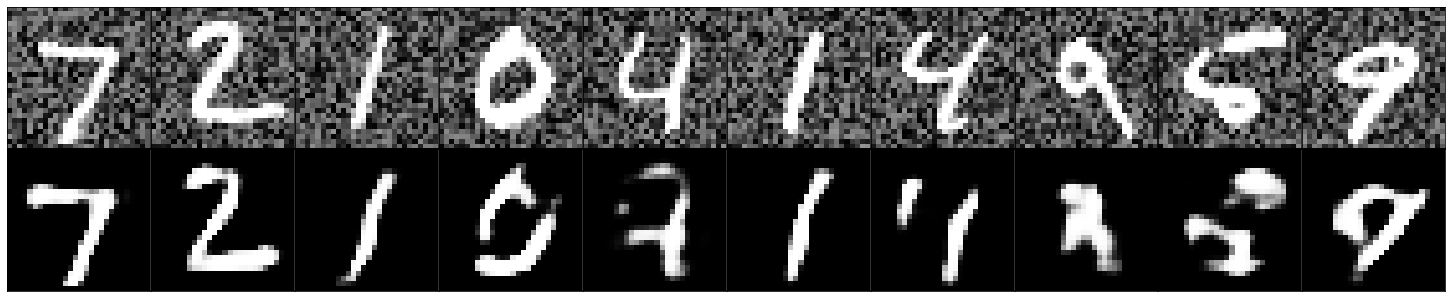

In [8]:
fig , axes = plt.subplots(nrows = 2 , ncols = 10 , sharex = True , sharey = True , figsize = (20 , 4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.rand(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs , 0. , 1.)

reconstructed = sess.run(decoded , feed_dict = {inputs_: noisy_imgs.reshape((10 , 28 , 28 , 1))})

for images, row in zip([noisy_imgs , reconstructed] , axes):
    for img, ax in zip(images , row):
        ax.imshow(img.reshape((28 , 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad = 0.1)